In [10]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, AncillaRegister
from qiskit.quantum_info import Statevector, Operator

import numpy as np

from QC_MP1_marker import *

## Demonstration for n=2

### How the functions are encoded?

The following code demonstrates the marker oracle function.

n is the number of qubits used to input. 

m is the number of qubits used for storing output.

The function f is just a list of values of the function for x = 0, 1, 2, 3.
In this case we have f = [1, 2, 3, -4] which means the functions is given by
$f(x_0, x_1)=1 + 2\,x_0+3\,x_1-4\,x_0x_1$.

t is the threshold. 

The constraint function C is given by C = [0, -1, 1, 0] which means we have 
$C(x_0, x_1)=-x_0+x_1$.

The function encoding is as follows:
The monomial corresonding to an index can be read from the binary string corresponding to that number. 
For example, the index 1 corresonds to the binary number 01 and hence to the monomial $x_0$. The index 2 corresponds to the binary number 10 and hence to the monomial $x_1$. The index 3 corresponds to the binary number 11 and hence to the monomial $x_0x_1$. The index 0 is for the constant coefficient.

In [ ]:
n = 2
m = 4
f = [1, 2, 3, -4] #ensure the list has length 2^n
t = 1
C = [0, -1, 1, 0] #ensure the list has length 2^n
if len(f) == (1 << n) and len(C) == (1 << n):
    qx = QuantumRegister(n, name="x")
    qz = QuantumRegister(m, name="z")
    qa = AncillaRegister(((2**n)-n-1)*m, name="a")
    qy = QuantumRegister(3, name="y")
    qc = QuantumCircuit(qx, qz, qa, qy)
    qc.h(qx)
    qc.compose(marker_anc(f, t, C, m), qubits=qx[:]+qz[:]+qa[:]+qy[:], inplace=True)
else:
    print("Check the length of lists f and/or C")

### Reading the output

The following is the output corresponding to a superposition of all input states. 

This is a 3 + 4 + 4 + 2 = 13-qubit state. 

The first 3 qubits $(y_2, y_1, y_0)$ correspond to the variable y. If $f(x)>t$ and $C(x)\ge 0$, then the first three qubits are all $1$. Specially the first qubit $(y_2)$ which checks if both conditions are satisfied, is 1. The second qubit $(y_1)$ is 1 if $C(x)\ge 0$. The third qubit $(y_0)$ is 1 if $f(x)> t$. If both conditions are not satisfied then all three qubits are 0. If we have $f(x)>t$ but $C(x)<0$, then the third qubit $(y_0)$ is 1 but the first two qubits are 0. If we have $C(x)\ge 0$ but $f(x)\le t$, then the second qubit $(y_1)$ is 1 but the first and third qubits are 0.

The next 4 qubits $(a_3, a_2, a_1, a_0)$ correspond to anicllas used for implementing MCP gates and they will all be zero in the output statevector since we take inverse. 

The next 4 quibts $(y_3, y_2, y_1, y_0)$ corresopond to the output of the functions encoded and they will also be all zero in the output statevector. 

The last 2 qubits $(x_1, x_0)$ are for the each input x. For every input x, the correponding check stored in y qubits can be verified. 

One can change the functions f, C and the threshold t in the code above and verify the correctness of the marker-oracle function. Note that the output is in 2's complement notation. So if for m=4, we have an output of 10 then it will be treated as negative number since in 2's complement notation 10 is actually 10-16=-6. For m=4, the possible outputs in increase order of the corresponding binary sequences are: 0, 1, 2, 3, 4, 5, 6, 7, -8, -7, -6, -5, -4, -3, -2, -1.

In [34]:
Statevector(qc).draw("Latex")

<IPython.core.display.Latex object>

### The circuit diagram

The following diagram shows the marker oracle circuit applied to a superposition of all possible 2-qubit inputs. 

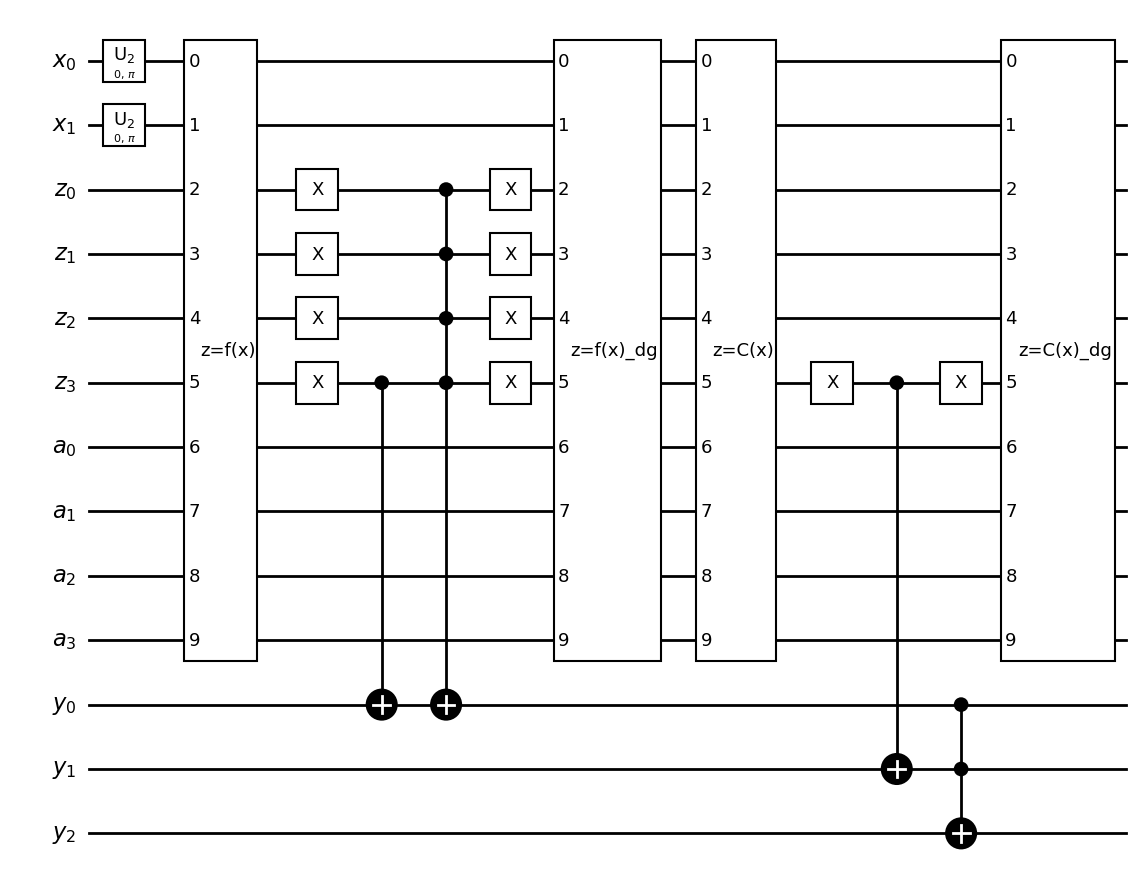

In [4]:
qc.decompose().draw(output="mpl", style="bw")

### Demonstration on a single input instead of superposition

The following code demonstrates the marker oracle for a single input number x instead of a superposition of all inputs. Specifically the gate prep_input loads a given number x into the input register qx and then the marker oracle is applied to an input $\ket{x}\ket{y}$ and we have 

$U_{f,t,C}\ket{x}\ket{y_2}\ket{y_1}\ket{y_0}=\begin{cases}\ket{x}\ket{y_2}\ket{y_1\oplus 1}\ket{y_0} & \text{if }f(x)\le t,\ C(x)\ge 0 \\ 
\ket{x}\ket{y_2}\ket{y_1}\ket{y_0\oplus 1} & \text{if }f(x)>t,\ C(x)< 0 \\ 
\ket{x}\ket{y_2\oplus 1}\ket{y_1\oplus 1}\ket{y_0\oplus 1} & \text{if }f(x) > t,\ C(x)\ge 0\end{cases}$.

In [ ]:
n = 2
m = 4
x = 2
f = [1, 1, -1, 2] #ensure the list has length 2^n
t = 2
C = [1, -1, -1, 1] #ensure the list has length 2^n
if len(f) == (1 << n) and len(C) == (1 << n):
    qx = QuantumRegister(n, name="x")
    qz = QuantumRegister(m, name="z")
    qa = AncillaRegister(((2**n)-n-1)*m, name="a")
    qy = QuantumRegister(3, name="y")
    qc = QuantumCircuit(qx, qz, qa, qy)
    qc.compose(prep_input(x, n), qubits=qx[:], inplace=True)
    qc.compose(marker_anc(f, t, C, m), qubits=qx[:]+qz[:]+qa[:]+qy[:], inplace=True)
else:
    print("Check the length of lists f and/or C")

In [32]:
Statevector(qc).draw("Latex")

<IPython.core.display.Latex object>

## Demonstration for n = 3

The above procedure works just fine for n = 3 as well. In fact it works for any n. 

The only downside is that even for n=3, for example in the code below, it takes about an hour!

For the code below we have 

$f(x)=1+2x_0+3x_1+x_2-4x_0x_1-x_0x_2+x_0x_1x_2$, 

$C(x)=-x_0+x_1+x_2-x_1x_2+x_0x_1x_2\quad $ and $\quad t=-1$.

The notation here is same as that of $n=2$, or for any $n$. For example, to get the coefficient of $x_0x_2$ we write the binary number 101 (since the given monomial has $x_2$ and $x_0$ we make the corresponding bits 1), and hence coeffcient of $x_0x_2$ is f[5]. As another example, the coeffienct of $x_0x_1$ is determined by the binary number $110$, so it is f[6].

In [ ]:
n = 3
m = 4
x = 2
f = [1, 2, 3, -4, 1, -1, 0, 1] #ensure the list has length 2^n
t = -1
C = [0, -1, 1, 0, 1, 0, -1, 1] #ensure the list has length 2^n
if len(f) == (1 << n) and len(C) == (1 << n):
    qx = QuantumRegister(n, name="x")
    qz = QuantumRegister(m, name="z")
    qa = AncillaRegister(((2**n)-n-1)*m, name="a")
    qy = QuantumRegister(3, name="y")
    qc = QuantumCircuit(qx, qz, qa, qy)
    #qc.compose(prep_input(x, n), qubits=qx[:], inplace=True)
    qc.h(qx)
    qc.compose(marker_anc(f, t, C, m), qubits=qx[:]+qz[:]+qa[:]+qy[:], inplace=True)
else:
    print("Check the length of lists f and/or C")

In [6]:
Statevector(qc).draw("Latex")

<IPython.core.display.Latex object>